**<h1> Data Science**

Install dependencies

In [ ]:
!pip install panda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import libraries

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np


from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load Data

In [ ]:
# Load the data
df = pd.read_csv('/content/gdrive/My Drive/Datasets/Medische_dataset/medisch-centrum-randstad-clean.csv')
df = df.drop(columns=["Unnamed: 0"], axis=1)

Split Data

In [ ]:
X = df[["genetic", "BMI", "exercise", "smoking", "alcohol", "sugar"]]
y = df["lifespan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Check dataframe

In [ ]:
df

,genetic,BMI,exercise,smoking,alcohol,sugar,lifespan
0,80.0,30.2,0.0,4.0,8.0,4,57
1,76.0,18.4,1.0,17.0,8.0,4,59
2,80.0,26.0,2.0,12.0,5.0,3,73
3,80.0,33.6,2.0,7.0,9.0,3,69
4,81.0,29.0,3.0,14.0,9.0,1,84
...,...,...,...,...,...,...,...
8173,77.0,24.2,3.0,2.0,3.0,2,94
8174,81.0,21.7,1.0,22.0,6.0,2,67
8175,82.0,30.0,1.0,0.0,8.0,4,69
8176,83.0,27.8,2.0,16.0,9.0,3,74


Correct dataframe

In [ ]:
missing_rows = df['genetic']
missing_row_indexes = missing_rows.index
print(missing_row_indexes)

RangeIndex(start=0, stop=8178, step=1)


Separate the input features (X) and the target variable (y)

In [ ]:
X = df.drop(columns='lifespan')
y = df['lifespan']

Create the model

In [ ]:

model = RandomForestRegressor(n_estimators=100, random_state=2)

 Define the hyperparameter grid

In [ ]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 6]
}

Create the grid search object

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)

Fit the grid search object to the training data

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 6], 'n_estimators': [100]},
             return_train_score=True, scoring='neg_mean_absolute_error')

Check best params

In [ ]:
best_params = grid_search.best_params_
print('Best hyperparameters: ', best_params)

Best hyperparameters:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}


Get the best model

In [ ]:
best_model = grid_search.best_estimator_

Calculate the accuracy 

In [ ]:
# Calculate the accuracy of the best model on the test data
accuracy = best_model.score(X_test, y_test)
print('Model accuracy: ', accuracy)

Model accuracy:  0.9069574692907829


Generate predictions 

In [ ]:
# Generate predictions on the validation set
y_pred = best_model.predict(X_test).astype(int)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)

      Actual  Predicted
8044      68         68
2932      79         76
6003      89         89
3316      69         66
3535      70         73
...      ...        ...
6754      64         65
84        58         60
6535      70         73
2589      74         69
2922      75         77

[1636 rows x 2 columns]


Scatter plot

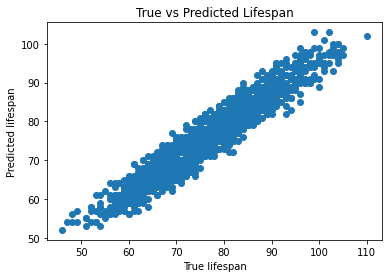

In [ ]:
# Create a scatter plot
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True lifespan')
plt.ylabel('Predicted lifespan')
plt.title('True vs Predicted Lifespan')
plt.show()

Plot importance

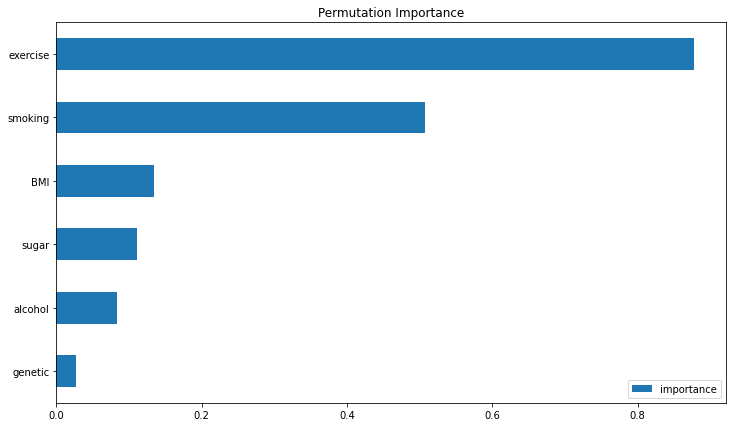

In [ ]:

# Convert permutation importance to a DataFrame and plot permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
imp_df = pd.DataFrame(result.importances_mean, index=X_test.columns, columns=['importance'])

imp_df.sort_values(by='importance').plot(kind='barh', figsize=(12,7))
plt.title('Permutation Importance')
plt.show()


Export model

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib


# Save the model to a file
joblib.dump(best_model, "/content/gdrive/My Drive/Datasets/Medische_dataset/Medische_data_model_Manual_scikitlearn2b.pkl")

['/content/gdrive/My Drive/Datasets/Medische_dataset/Medische_data_model_Manual_scikitlearn2b.pkl']